<a href="https://colab.research.google.com/github/DivyanshuBITS/Mobility-Improvement-using-SDN/blob/main/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving superstore.csv to superstore.csv


In [3]:
df = pd.read_csv('superstore.csv', encoding='latin-1')

**Exploratory Data Analysis**

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

There is no null value in dataset.

In [6]:
df.shape

(9994, 21)

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df['Order Date'].unique().shape[0]

1237

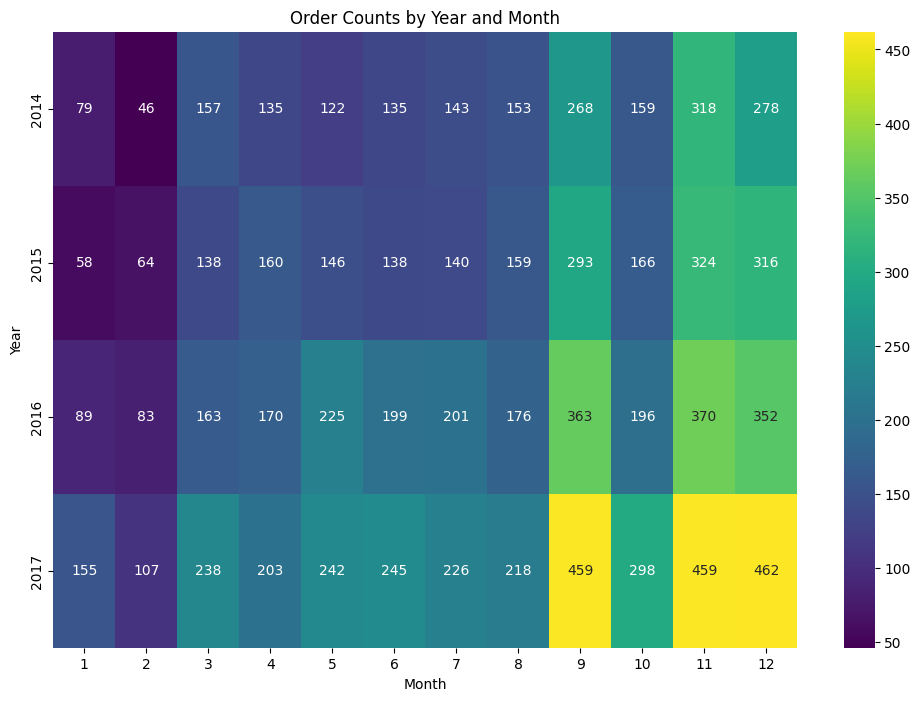

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
orders_by_month_year = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month]).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(orders_by_month_year, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Order Counts by Year and Month')
plt.show()

* The last four months of the year (September to December) are consistently the busiest period.
* Consistent year over-year growth


In [10]:
#now let's see if there are missing values
missing = df.isnull().sum()
print(missing)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


* There is no missing value.

In [11]:
df.describe()

,Row ID,Order Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


* The maximum sale is very high ($22,638) compared to the average ($229), which strongly indicates the presence of outliers or a few very large orders.
* The minimum profit is highly negative (-$6,599). This is showing that some sales are extremely unprofitable.

In [12]:
#columns has unique values with their frequencies
categorical_cols = ['Segment', 'Category', 'Sub-Category', 'Region', 'State', 'Ship Mode']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col} :-")
        print(f"Unique values: {df[col].nunique()}")
        print(df[col].value_counts())


Segment :-
Unique values: 3
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Category :-
Unique values: 3
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Sub-Category :-
Unique values: 17
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Region :-
Unique values: 4
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

State :-
Unique values: 49
State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois              

*Office Supplies is the most sold category by volume.
*Binders and Paper are the most frequently sold individual product.

In [13]:
df['Ship Date']

,Ship Date
0,11/11/2016
1,11/11/2016
2,6/16/2016
3,10/18/2015
4,10/18/2015
...,...
9989,1/23/2014
9990,3/3/2017
9991,3/3/2017
9992,3/3/2017


*ship date is not in datetime.

In [14]:
df['Order Date']

,Order Date
0,2016-11-08
1,2016-11-08
2,2016-06-12
3,2015-10-11
4,2015-10-11
...,...
9989,2014-01-21
9990,2017-02-26
9991,2017-02-26
9992,2017-02-26


* Since Order date is in datetime object there is no need for any conversion







# **Network Analysis of Product Relationships**

*Gonna see which products are frequently bought together.

In [15]:
#preparing data for network analysis
#grouping by order id to get all product names in each order
order_products = df.groupby('Order ID')['Product Name'].apply(list).reset_index()

In [16]:
# filtering out orders with only one product as they don't form pairs
order_products = order_products[order_products['Product Name'].apply(len) > 1]

In [17]:
from itertools import combinations

In [18]:
# Create edges (pairs of products) for each order using itertools.combinations
edges = []
for products_list in order_products['Product Name']:
    # Sorting products in the list to ensure consistent pair order (for example-('A', 'B') is same as ('B', 'A'))
    sorted_products = sorted(products_list)
    for pair in combinations(sorted_products, 2):
        edges.append(pair)

In [19]:
# now let's count the frequency of each product pair
edge_counts = pd.Series(edges).value_counts().reset_index()
edge_counts.columns = ['Product Pair', 'Frequency']

In [20]:
# Displaying the top most frequent product pairs for network visualization
top_n_pairs = 25
most_frequent_pairs = edge_counts.head(25)
print(most_frequent_pairs)

                                         Product Pair  Frequency
0   (Logitech VX Revolution Cordless Laser Mouse f...          2
1                             (Xerox 1894, Xerox 225)          2
2   (Acco Perma 4000 Stacking Storage Drawers, Can...          2
3            (Avery 505, OIC #2 Pencils, Medium Soft)          2
4   (Carina Double Wide Media Storage Towers in Na...          2
5   (GBC Plastic Binding Combs, Hon Valutask Swive...          2
6               (KI Adjustable-Height Table, Staples)          2
7   (Belkin Premiere Surge Master II 8-outlet surg...          2
8   (GBC Recycled VeloBinder Covers, Wilson Jones ...          2
9   (GBC VeloBinder Manual Binding System, Inserta...          2
10  (Acco Hot Clips Clips to Go, Flat Face Poster ...          2
11  (Memorex Micro Travel Drive 16 GB, Wirebound F...          2
12  (Memorex Micro Travel Drive 16 GB, Staple-base...          2
13  (GBC Standard Therm-A-Bind Covers, Google Nexu...          2
14  (Anker 36W 4-Port USB

Observation - so there are 24 product pairs exists.

In [21]:
import networkx as nx

In [22]:
#building the network graph
G = nx.Graph() #this will create an empty undirected graph

In [23]:
#adding nodes and edges, here nodes are individual products and edges are co-purchase relationship
for index, row in most_frequent_pairs.iterrows():
    product1, product2 = row['Product Pair']
    frequency = row['Frequency']
    G.add_edge(product1, product2, weight = frequency)

# Visualization of the Network Graph

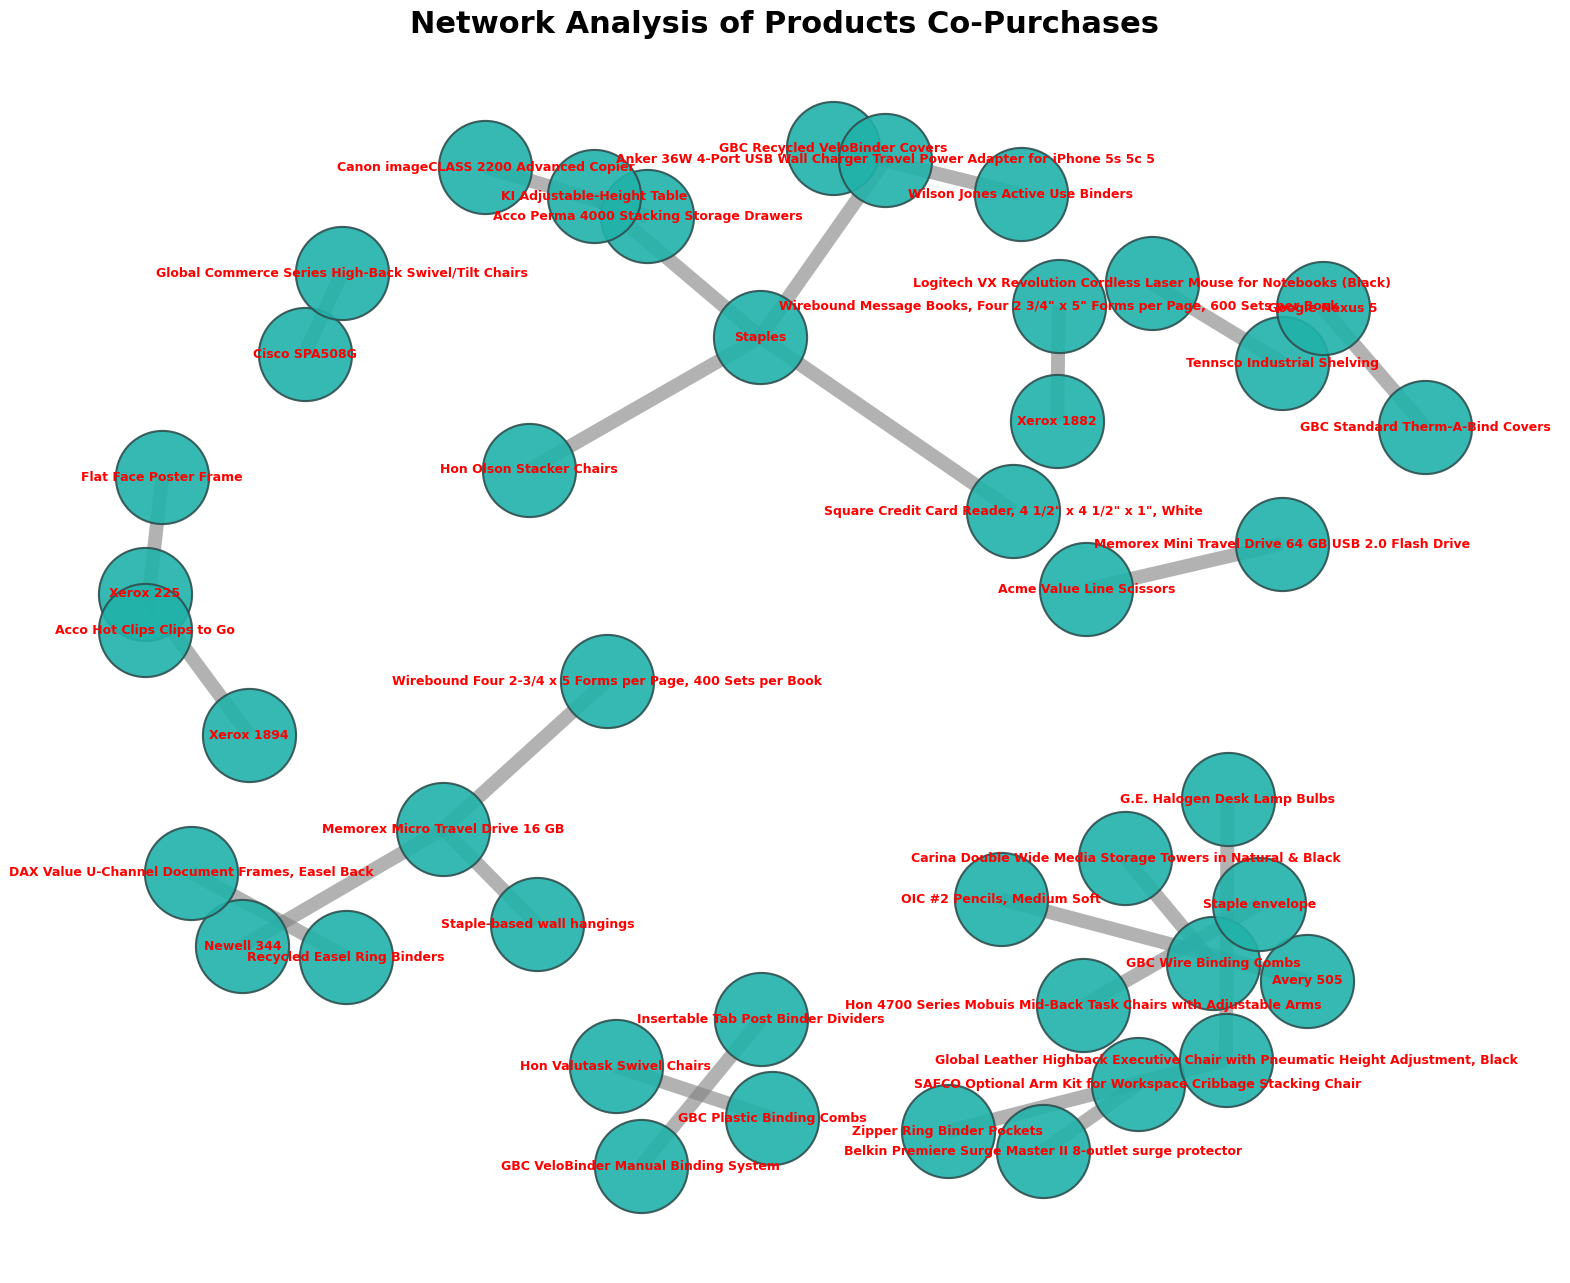

In [24]:
plt.figure(figsize = (20,16)) # I have increased figure size for better visualization
pos = nx.spring_layout(G, k = 0.9, iterations = 70, seed = 42)
# nodes (products)
nx.draw_networkx_nodes(G, pos, node_size=4500, node_color='lightseagreen', alpha=0.9, linewidths=1.5, edgecolors='darkslategray')
# edges(co-purchase links)
max_freq = most_frequent_pairs['Frequency'].max()
edge_widths = [d['weight'] / max_freq * 10 for u, v, d in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_widths, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', font_color='red')
plt.title(f"Network Analysis of Products Co-Purchases", size=22, weight='bold')
plt.axis('off')
plt.show()


* nodes that are very close together are highly connected to each other.
In the spring_layout algorithm's simulation, the "springs" (representing edges/connections) between these nodes are very strong because the products they represent are very frequently co-purchased. These strong attractive forces pull them into tight clusters.These are natural product groupings or bundles that customers consistently buy together.

* This technique leverages graph theory to visually represent product co-purchase patterns. Instead of just showing lists of frequently bought items, it constructs a network where each 'node' is a product and a connection(edge) signifies co-purchase within an order. The thickness of the edge directly indicates the frequency and strength of this relationship.

# **Time-Series Clustering of Customer Behavior**

In [25]:
#here my goal is to identify distinct customer segments based on their monthly purchasing patterns over time.
#now i know that order date is a datetime object
df['Order Month'] = df['Order Date'].dt.to_period('M')
#now i'm grouping the customer id and order month to get monthly sales for each customer
customer_monthly_sales = df.groupby(['Customer ID', 'Order Month'])['Sales'].sum().unstack(fill_value=0)
all_months = pd.period_range(start = df['Order Month'].min(), end = df['Order Month'].max(), freq = 'M') #ensuring all customers have time series of same length , M is for monthly frequency
customer_monthly_sales = customer_monthly_sales.reindex(columns=all_months, fill_value=0)

In [26]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #standard scaler ensures mean 0 and standard deviation 1.
customer_monthly_sales_scaled = scaler.fit_transform(customer_monthly_sales)
customer_monthly_sales_scaled = pd.DataFrame(customer_monthly_sales_scaled,index = customer_monthly_sales.index, columns=customer_monthly_sales.columns)

In [27]:
print(customer_monthly_sales_scaled.iloc[:5, :5])

              2014-01   2014-02   2014-03   2014-04   2014-05
Customer ID                                                  
AA-10315    -0.093511 -0.088528  0.749681 -0.158805 -0.154140
AA-10375    -0.093511 -0.088528 -0.080218 -0.085280 -0.154140
AA-10480    -0.093511 -0.088528 -0.080218 -0.158805 -0.012205
AA-10645    -0.093511 -0.088528 -0.080218 -0.158805 -0.154140
AB-10015    -0.093511  0.107547  0.273413 -0.158805 -0.154140


* negative values are indicating that the customer's sales for a given month is less than the average sakes for that month across all customers.

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
#clustering
n = 5
cluster = AgglomerativeClustering(n_clusters=n)
#customer_monthly_sales_scaled.columns = customer_monthly_sales_scaled.columns.astype(str)
customer_monthly_sales['Cluster'] = cluster.fit_predict(customer_monthly_sales_scaled.values)

In [30]:
customer_monthly_sales['Cluster'].value_counts()

,count
Cluster,
1,765
3,13
4,11
0,3
2,1


In [31]:
cluster_profiles = customer_monthly_sales.groupby('Cluster').mean()

In [32]:
cluster_profiles.columns

Index([2014-01, 2014-02, 2014-03, 2014-04, 2014-05, 2014-06, 2014-07, 2014-08,
       2014-09, 2014-10, 2014-11, 2014-12, 2015-01, 2015-02, 2015-03, 2015-04,
       2015-05, 2015-06, 2015-07, 2015-08, 2015-09, 2015-10, 2015-11, 2015-12,
       2016-01, 2016-02, 2016-03, 2016-04, 2016-05, 2016-06, 2016-07, 2016-08,
       2016-09, 2016-10, 2016-11, 2016-12, 2017-01, 2017-02, 2017-03, 2017-04,
       2017-05, 2017-06, 2017-07, 2017-08, 2017-09, 2017-10, 2017-11, 2017-12],
      dtype='object')

In [33]:
cluster_profiles.head()

,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1458.293333,0.000000,0.000000,3.194667,0.000000,0.000000,0.000000,0.000000,70.043333,0.000000,...,762.725333,0.000000,0.000000,181.380000,0.000000,1.984000,0.000000,0.000000,117.819333,73.865333
1,12.891523,5.738986,40.908043,35.482616,17.801468,43.775631,31.459324,33.198829,77.065601,40.732775,...,51.154493,46.794936,56.763066,68.237043,57.006651,82.401244,113.968431,100.863432,147.214027,106.003485
2,0.000000,0.000000,23661.228000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,526.450000,0.000000,0.000000,7.968000,0.000000,0.000000
3,0.000000,9.966769,1.196308,64.552615,0.000000,85.136154,745.692769,28.872308,1739.387385,0.000000,...,23.069231,42.170769,5.396000,6.443077,63.236308,0.000000,0.000000,46.802308,126.019385,4.843077
4,0.000000,0.000000,65.416000,27.488727,911.833091,0.000000,16.909455,194.274909,0.000000,26.620000,...,1559.190000,15.926364,69.746945,13.862545,27.800545,7.089455,61.891091,0.000000,348.853091,222.917909


In [34]:
plt.figure(figsize=(18,10))
#transposing the dataframe so that months are on the x axis and each column represent a cluster's average sales
cluster_profiles_T = cluster_profiles.T

<Figure size 1800x1000 with 0 Axes>

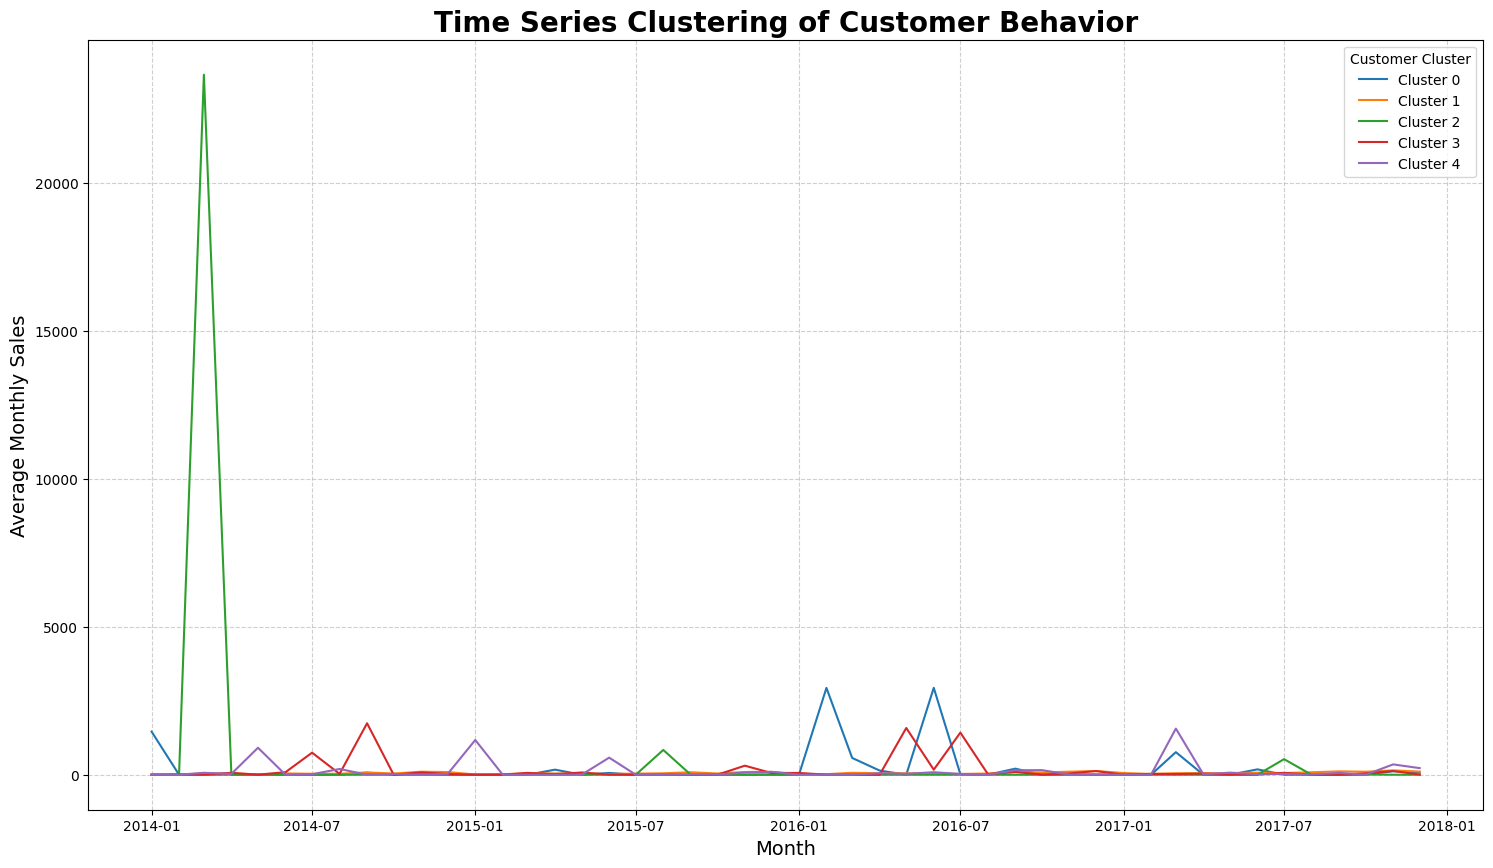

In [35]:
# Plot each cluster's average monthly sales over time
plt.figure(figsize=(18, 10))
for cluster_id in cluster_profiles_T.columns:
    x_values = pd.to_datetime(cluster_profiles_T.index.astype(str))
    y_values = cluster_profiles_T[cluster_id]
    plt.plot(x_values, y_values, label=f'Cluster {cluster_id}')

plt.title('Time Series Clustering of Customer Behavior', fontsize=20, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Monthly Sales', fontsize=14)
plt.legend(title='Customer Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Geospatial Analysis

* now creating a choropleth map of the United States to visualize sales and profitability by state. This is far more impactful than a simple bar chart, as it instantly reveals regional strengths, weaknesses, and potential market opportunities.

In [36]:
import plotly.express as px
#let's prepare data by states
df['State'] = df['State'].str.strip()#removing leading or trailing whitespaces from state names
state_data = df.groupby('State').agg(Total_sales = ('Sales', 'sum'), Total_profit = ('Profit', 'sum'), Customer_Count = ('Customer ID', 'nunique')).reset_index()
#profit  ratio
state_data['Profit_Ratio'] = (state_data['Total_profit'] / state_data['Total_sales'])*100
state_data.head()

,State,Total_sales,Total_profit,Customer_Count,Profit_Ratio
0,Alabama,19510.6400,5786.8253,34,29.659844
1,Arizona,35282.0010,-3427.9246,100,-9.715789
2,Arkansas,11678.1300,4008.6871,27,34.326447
3,California,457687.6315,76381.3871,577,16.688541
4,Colorado,32108.1180,-6527.8579,75,-20.330864


In [37]:
df['State']

,State
0,Kentucky
1,Kentucky
2,California
3,Florida
4,Florida
...,...
9989,Florida
9990,California
9991,California
9992,California


In [38]:
# #now creating the interactive map and coloring the states based on their total sales
# fig = px.choropleth(state_data,
#                     locations = 'State',
#                     locationmode = 'USA-states',
#                     color = 'Total_sales',
#                     scope = 'usa',
#                     hover_name='State',
#                     hover_data={'Total_profit': ':.2f', 'Profit_Ratio': ':.2f', 'Customer_Count': True },
#                     color_continuous_scale="Viridis",
#                     title="Geospatial Analysis: Total Sales & Profitability by State" )
# fig.show()

In [39]:
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           49 non-null     object 
 1   Total_sales     49 non-null     float64
 2   Total_profit    49 non-null     float64
 3   Customer_Count  49 non-null     int64  
 4   Profit_Ratio    49 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.0+ KB


# Recency, Frequency, and Monetary Calculation

* recency is how recently a customer has made a purchase. Low recency value(higher recency score) shows recent purchase.

In [40]:
# snapshot date for recency calculation (one day after the last order)
snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
rfm_data = df.groupby('Customer ID').agg({'Order Date': lambda date: (snapshot_date - date.max()).days,'Order ID': 'nunique', 'Sales': 'sum'})
rfm_data.rename(columns={'Order Date': 'Recency','Order ID': 'Frequency','Sales': 'MonetaryValue'}, inplace=True)
#Lower Recency is better, Higher Frequency and Monetary are better.
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=r_labels, duplicates='drop').astype(int)
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 5, labels=f_labels, duplicates='drop').astype(int)
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], 5, labels=m_labels, duplicates='drop').astype(int)
#using the weighted formula: 50% Recency, 25% Frequency, 25% Monetary
rfm_data['Customer_Health_Score'] = (0.5 * rfm_data['R_Score']) + (0.25 * rfm_data['F_Score']) + (0.25 * rfm_data['M_Score'])
# Normalize the score to a 0-100
max_possible_score = (0.5*5) + (0.25*5) + (0.25*5) # Max score is 5
min_possible_score = (0.5*1) + (0.25*1) + (0.25*1) # Min score is 1
rfm_data['Customer_Health_Score'] = ((rfm_data['Customer_Health_Score'] - min_possible_score) / (max_possible_score - min_possible_score)) * 100
#Display the top customers by health score
print(rfm_data.sort_values('Customer_Health_Score', ascending=False).head())

             Recency  Frequency  MonetaryValue  R_Score  F_Score  M_Score  \
Customer ID                                                                 
AH-10210           7          9       4805.344        5        5        5   
SM-20950          26         12       5563.392        5        5        5   
SE-20110          10         11      12209.438        5        5        5   
TP-21130           9          9       4454.056        5        5        5   
AI-10855          14         10       4375.786        5        5        5   

             Customer_Health_Score  
Customer ID                         
AH-10210                     100.0  
SM-20950                     100.0  
SE-20110                     100.0  
TP-21130                     100.0  
AI-10855                     100.0  


In [41]:
#Aggregate data by product
product_data = df.groupby('Product Name').agg(Total_Sales=('Sales', 'sum'),Total_Profit=('Profit', 'sum')).reset_index()
# Filter out products with zero or negative sales to avoid division by zero
product_data = product_data[product_data['Total_Sales'] > 0]
product_data['Profit_Margin'] = (product_data['Total_Profit'] / product_data['Total_Sales']) * 100
# Rank products by sales and profit margin
product_data['Sales_Rank_Score'] = product_data['Total_Sales'].rank(pct=True)
product_data['Margin_Rank_Score'] = product_data['Profit_Margin'].rank(pct=True)
# We give equal weight to sales volume and profitability
product_data['Product_Velocity_Index'] = (product_data['Sales_Rank_Score'] + product_data['Margin_Rank_Score']) * 50 # Scale to 100
# Display the top products by velocity index
print(product_data.sort_values('Product_Velocity_Index', ascending=False).head())

                                           Product Name  Total_Sales  \
165                   Ativa V4110MDD Micro-Cut Shredder      7699.89   
1840                  Zebra ZM400 Thermal Label Printer      6965.70   
405   Canon imageCLASS MF7460 Monochrome Digital Las...      3991.98   
812   Hewlett-Packard Desktjet 6988DT Refurbished Pr...      3404.50   
807   Hewlett-Packard Deskjet 3050a All-in-One Color...      3040.00   

      Total_Profit  Profit_Margin  Sales_Rank_Score  Margin_Rank_Score  \
165      3772.9461           49.0          0.973514           0.994595   
1840     3343.5360           48.0          0.968649           0.981351   
405      1995.9900           50.0          0.918919           0.998649   
812      1668.2050           49.0          0.902162           0.994595   
807      1459.2000           48.0          0.891351           0.986486   

      Product_Velocity_Index  
165                98.405405  
1840               97.500000  
405                95.878378 

* now calculating the number of unique customers in each state to identify regions with a strong customer base.

/tmp/ipython-input-1519333036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unique_Customer_Count', y='State', data=market_penetration, palette='coolwarm')


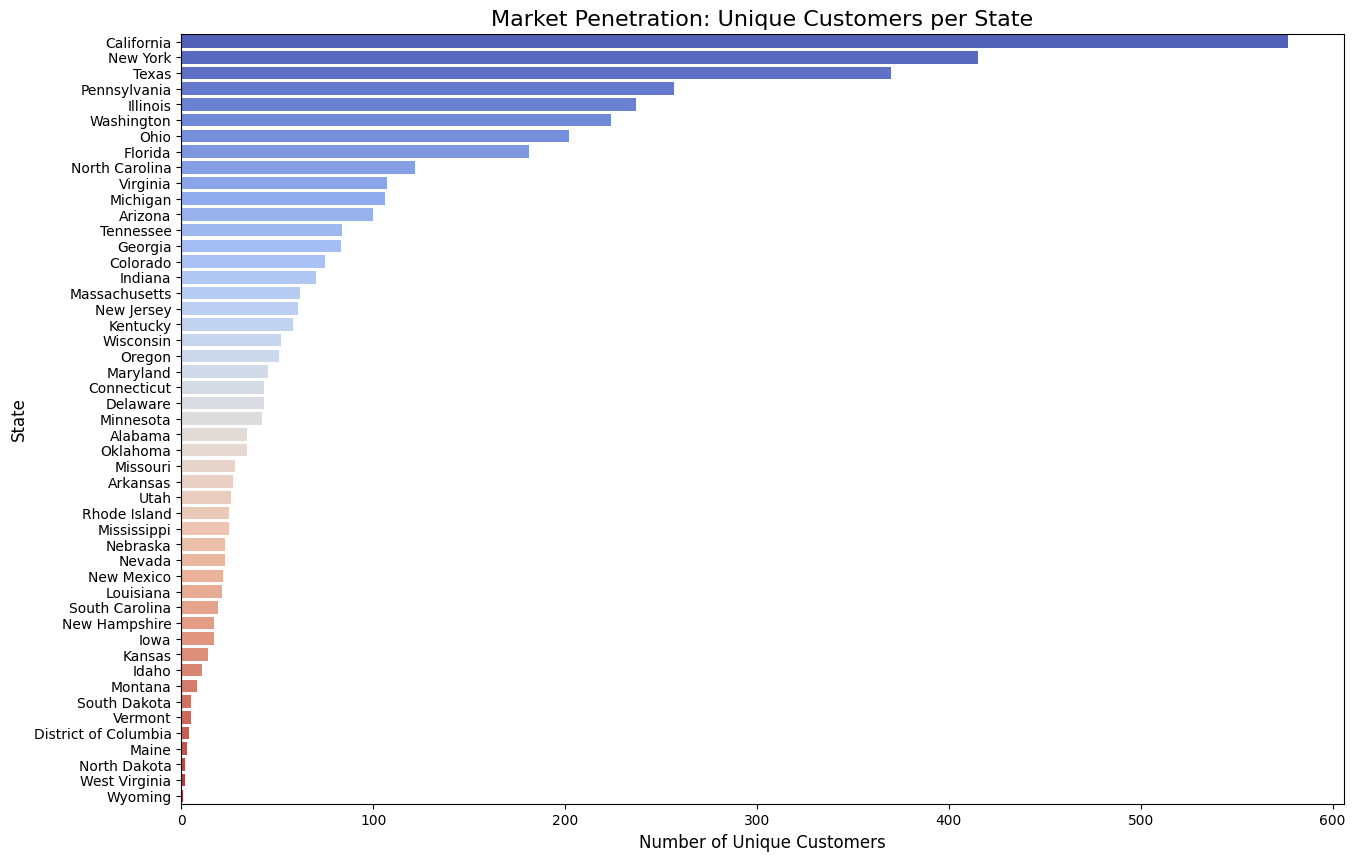

--- Top 5 States by Customer Count ---
           State  Unique_Customer_Count
3     California                    577
30      New York                    415
41         Texas                    370
36  Pennsylvania                    257
11      Illinois                    237

--- Bottom 5 States by Customer Count ---
                   State  Unique_Customer_Count
7   District of Columbia                      4
17                 Maine                      3
32          North Dakota                      2
46         West Virginia                      2
48               Wyoming                      1


In [42]:
#Calculate unique customers per state
market_penetration = df.groupby('State')['Customer ID'].nunique().reset_index()
market_penetration.rename(columns={'Customer ID': 'Unique_Customer_Count'}, inplace=True)
market_penetration = market_penetration.sort_values('Unique_Customer_Count', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='Unique_Customer_Count', y='State', data=market_penetration, palette='coolwarm')
plt.title('Market Penetration: Unique Customers per State', fontsize=16)
plt.xlabel('Number of Unique Customers', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.show()
print("--- Top 5 States by Customer Count ---")
print(market_penetration.head())
print("\n--- Bottom 5 States by Customer Count ---")
print(market_penetration.tail())

In [45]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Defining promised shipping times
promised_times = {'Same Day': 0,'First Class': 1,'Second Class': 3,'Standard Class': 5}
df['Promised_Time'] = df['Ship Mode'].map(promised_times)
# Calculating actual shipping time
df['Actual_Ship_Time'] = (df['Ship Date'] - df['Order Date']).dt.days
# checking if each order was on time -
df['Is_On_Time'] = df['Actual_Ship_Time'] <= df['Promised_Time']

on_time_percentage = df['Is_On_Time'].mean() * 100
print(f"--- Operational Excellence Score ---")
print(f"On-Time Shipping Percentage: {on_time_percentage:.2f}%")

--- Operational Excellence Score ---
On-Time Shipping Percentage: 61.56%


In [46]:
# Aggregate data by Category
category_data = df.groupby('Category').agg( Total_Sales=('Sales', 'sum'), Total_Profit=('Profit', 'sum')).reset_index()

# Calculate Market Share and Profit Margin
total_company_sales = category_data['Total_Sales'].sum()
category_data['Market_Share'] = (category_data['Total_Sales'] / total_company_sales)
category_data['Profit_Margin'] = (category_data['Total_Profit'] / category_data['Total_Sales'])
category_data['Market_Share_Score'] = category_data['Market_Share'].rank(pct=True)
category_data['Profit_Margin_Score'] = category_data['Profit_Margin'].rank(pct=True)
category_data['Competitive_Advantage_Index'] = (category_data['Market_Share_Score'] + category_data['Profit_Margin_Score']) * 50
print(category_data.sort_values('Competitive_Advantage_Index', ascending=False))

          Category  Total_Sales  Total_Profit  Market_Share  Profit_Margin  \
2       Technology  836154.0330   145454.9481      0.363988       0.173957   
0        Furniture  741999.7953    18451.2728      0.323002       0.024867   
1  Office Supplies  719047.0320   122490.8008      0.313010       0.170352   

   Market_Share_Score  Profit_Margin_Score  Competitive_Advantage_Index  
2            1.000000             1.000000                        100.0  
0            0.666667             0.333333                         50.0  
1            0.333333             0.666667                         50.0  
